<a href="https://colab.research.google.com/github/prarthanaVengurlekar5/Computer-Vision/blob/main/Shop_Name_Plate_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Shop Name Plate Recognition**

# Step 1 :  Check version of CUDA present in our system

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


# Step 2 : Installing and Importing the required packages

In [3]:
!pip install easyocr
!pip install imutils
!pip install opencv_python

!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 18.4 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cu121


In [5]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# Step 3 : Convert Color image to Grayscale format

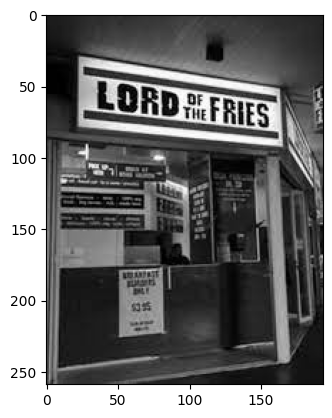

In [47]:
img = cv2.imread('/content/drive/MyDrive/yolo/M.jpg')
gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
plt.imshow (cv2. cvtColor(gray, cv2.COLOR_BGR2RGB))



# Step 4 : Apply filter and Edged Detection

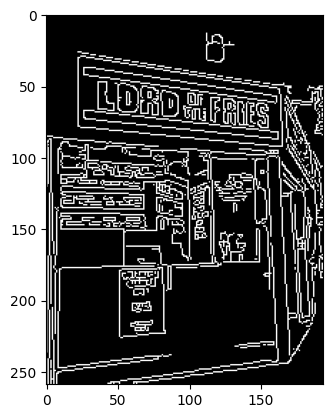

In [48]:
bfilter = cv2.bilateralFilter(gray, 11, 17,  17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# Step 5 : Find Contours And apply mask

In [49]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [50]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len (approx) == 4:
       location = approx
       break

In [51]:
location

array([[[ 22,  30]],

       [[ 24,  79]],

       [[165,  92]],

       [[161,  51]]], dtype=int32)

In [52]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

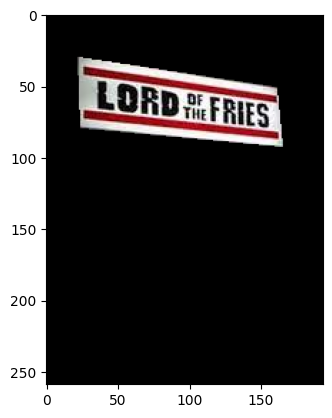

In [53]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

# Step 6 : Use Easy OCR To Read Text

In [57]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

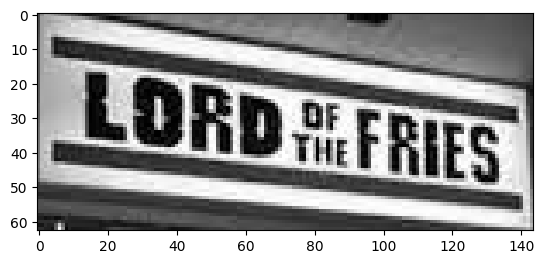

In [58]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [60]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[5, 9], [95, 9], [95, 49], [5, 49]], 'LDRDHI', 0.14081092360817007),
 ([[90.05131670194949, 20.15395010584846],
   [141.86733702616584, 29.11774245348743],
   [135.94868329805053, 55.84604989415154],
   [84.13266297383414, 46.88225754651257]],
  'HRIES',
  0.28381790213746777)]

# Step 7 : Plot the Result

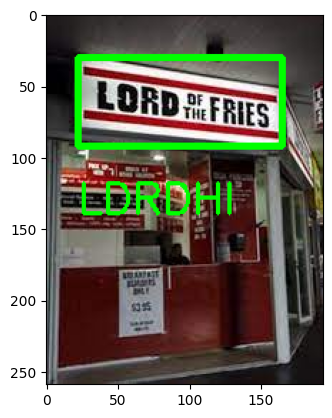

In [67]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2 )
res = cv2.rectangle(img, tuple(approx[0][0]), (approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))